<ipython-input-1-f38125452067>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['quality'] = labelencoder.fit_transform(train['quality'])


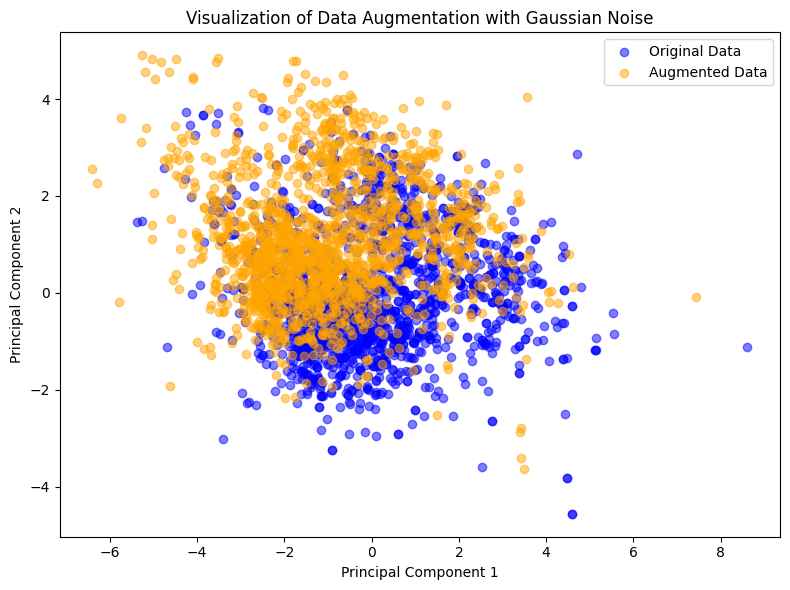

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the original dataset
df = pd.read_csv("https://raw.githubusercontent.com/ensemble-art/Dynamic-Logistic-Ensembles/main/allwine.csv",index_col = 0)
# Taking the top 1599 rows, as that was the original data which was used to augment and add the new rows as in the allwine data
train = df.head(1599)

# Encode the 'quality' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['quality'] = labelencoder.fit_transform(train['quality'])
y = train['quality']

# Extract features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = train[features]

# Create a copy of the original data for augmentation
train2 = train.copy()

# Add Gaussian noise to simulate internal group structures
for col in features:
    mu = train[col].mean() * 0.1
    sigma = train[col].std() * 0.1
    noise = np.random.normal(mu, sigma, train.shape[0])
    train2[col] = train2[col] + noise

# Combine the original and augmented data
train3 = pd.concat([train, train2], ignore_index=True)
y_combined = np.concatenate([y, y])

# Extract features from the combined dataset
X_combined = train3[features]

# Standardize the features using the same scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_combined_scaled = scaler.transform(X_combined)

# Apply PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_combined_pca = pca.transform(X_combined_scaled)

# Split the combined PCA data back into original and augmented parts
X_pca_original = X_pca
X_pca_augmented = X_combined_pca[len(X):]

# Plot the original and augmented data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_original[:, 0], X_pca_original[:, 1], alpha=0.5, label='Original Data', c='blue')
plt.scatter(X_pca_augmented[:, 0], X_pca_augmented[:, 1], alpha=0.5, label='Augmented Data', c='orange')
plt.title('Visualization of Data Augmentation with Gaussian Noise')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.savefig('the_data_augmentation.png', dpi=300)
plt.show()
